In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [5]:
## Load MINST DATASET

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [12]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test /255.0
#flatten the images
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [16]:
#define the fnn model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train the model
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8785 - loss: 0.4229 - val_accuracy: 0.9651 - val_loss: 0.1136
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9689 - loss: 0.1044 - val_accuracy: 0.9711 - val_loss: 0.0884
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9782 - loss: 0.0697 - val_accuracy: 0.9671 - val_loss: 0.1057
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9837 - loss: 0.0516 - val_accuracy: 0.9705 - val_loss: 0.0962
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9863 - loss: 0.0417 - val_accuracy: 0.9775 - val_loss: 0.0757
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9907 - loss: 0.0295 - val_accuracy: 0.9785 - val_loss: 0.0814
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9779 - val_loss: 0.0835
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9944 - loss: 0.0179 

313/313 - 0s - 1ms/step - accuracy: 0.9756 - loss: 0.1134

Test accuracy: 0.9756


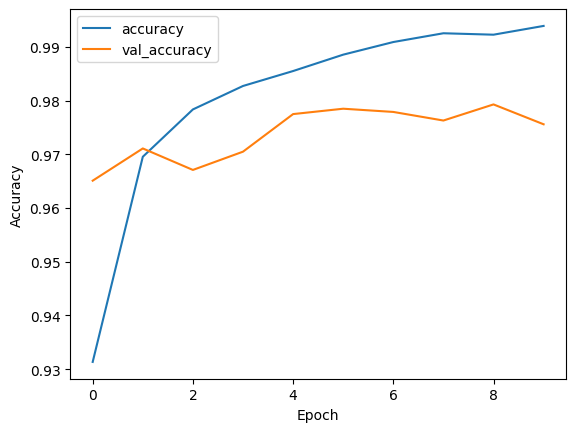

In [18]:
#evaluate model 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

#plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()